In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.linalg import svd, norm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import h5py
import os

In [2]:
#Load GADF Train Images

image_ht = 16
image_wt = 16

from PIL import Image
import glob
train_motor_image = []
for trn_motor in glob.glob('/Users/talukdarraianferdous/CPGM_GADF_CNN/GAFD_CNN/Train/Motor/*.png'): #load train motor images
    tm = Image.open(trn_motor).convert('L')
    train_motor_image.append(tm.resize((image_ht,image_wt)))

train_visual_image = []
for trn_visual in glob.glob('/Users/talukdarraianferdous/CPGM_GADF_CNN/GAFD_CNN/Train/Visual/*.png'): #load train motor images
    tv = Image.open(trn_visual).convert('L')
    train_visual_image.append(tv.resize((image_ht,image_wt)))   
    
    

In [3]:
len(train_motor_image)

568

In [4]:
len(train_visual_image)

568

In [5]:
#Store motor images pixel values in a dataframe
motor_train = pd.DataFrame(np.asarray(train_motor_image[1].getdata()).flatten())
for i in range(len(train_motor_image)):
    motor_train[i] = pd.DataFrame(np.asarray(train_motor_image[i].getdata()).flatten())
    i = i+1


In [6]:
#Store visual images pixel values in a dataframe
visual_train = pd.DataFrame(np.asarray(train_visual_image[1].getdata()).flatten())
for j in range(len(train_visual_image)):
    visual_train[j] = pd.DataFrame(np.asarray(train_visual_image[j].getdata()).flatten())
    j = j+1
    

In [7]:
#visual_train = pd.DataFrame(np.asarray(train_visual_image[1].getdata()).flatten())
visual_train

,0,1,2,3,4,5,6,7,8,9,...,558,559,560,561,562,563,564,565,566,567
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
252,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
253,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
254,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [8]:
motor_train

,0,1,2,3,4,5,6,7,8,9,...,558,559,560,561,562,563,564,565,566,567
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
252,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
253,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
254,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [9]:
x_train = pd.concat([motor_train,visual_train],axis=1,ignore_index=True)
x_train

,0,1,2,3,4,5,6,7,8,9,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
252,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
253,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
254,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [10]:
y_train_motor= pd.DataFrame(np.repeat(1,len(train_motor_image)))
y_train_motor = y_train_motor.T

In [11]:
y_train_visual= pd.DataFrame(np.repeat(0,len(train_visual_image)))
y_train_visual = y_train_visual.T

In [12]:
y_train = pd.concat([y_train_motor,y_train_visual.set_index(y_train_motor.index)],axis=1,ignore_index=True)

In [13]:
y_train

,0,1,2,3,4,5,6,7,8,9,...,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
test_motor_image = []
for tst_motor in glob.glob('/Users/talukdarraianferdous/CPGM_GADF_CNN/GAFD_CNN/Test/Motor/*.png'): #load train motor images
    ts_m = Image.open(tst_motor).convert('L')
    test_motor_image.append(ts_m.resize((image_ht,image_wt)))

test_visual_image = []
for tst_visual in glob.glob('/Users/talukdarraianferdous/CPGM_GADF_CNN/GAFD_CNN/Test/Visual/*.png'): #load train motor images
    ts_v = Image.open(tst_visual).convert('L')
    test_visual_image.append(ts_v.resize((image_ht,image_wt))) 

In [15]:
motor_test = pd.DataFrame(np.asarray(test_motor_image[1].getdata()).flatten())
for p in range(len(test_motor_image)):
    motor_test[p] = pd.DataFrame(np.asarray(test_motor_image[p].getdata()).flatten())
    p = p+1

In [16]:
visual_test = pd.DataFrame(np.asarray(test_visual_image[1].getdata()).flatten())
for q in range(len(test_visual_image)):
    visual_test[q] = pd.DataFrame(np.asarray(test_visual_image[q].getdata()).flatten())
    q = q+1

In [17]:
x_test = pd.concat([motor_test,visual_test],axis=1,ignore_index=True)

In [18]:
y_test_motor= pd.DataFrame(np.repeat(1,len(test_motor_image)))
y_test_motor = y_test_motor.T

In [19]:
y_test_visual= pd.DataFrame(np.repeat(0,len(test_visual_image)))
y_test_visual = y_test_visual.T

In [20]:
y_test = pd.concat([y_test_motor,y_test_visual],axis=1,ignore_index=True)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(256, 1136)
(1, 1136)
(256, 673)
(1, 673)


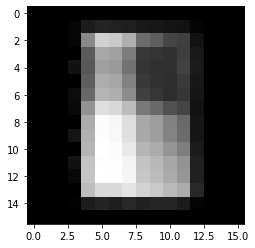

In [22]:
digit_image=x_train[0]
plt.imshow(digit_image.to_numpy().reshape(image_ht,image_wt),cmap='binary')

In [23]:
alpha_matrices={}
for i in range(2):
    alpha_matrices.update({"A"+str(i):x_train.loc[:,list(y_train.loc[0,:]==i)]})
print(alpha_matrices['A0'].shape)

(256, 568)


In [24]:
#Perform singular value decomposition and store U,S and Vt matrices
left_singular={}
singular_matrix={}
right_singular={}

for i in range(2):
    u, s, v_t = svd(alpha_matrices['A'+str(i)], full_matrices=False)
    left_singular.update({"u"+str(i):u})
    singular_matrix.update({"s"+str(i):s})
    right_singular.update({"v_t"+str(i):v_t})

print(left_singular['u0'].shape)

(256, 256)


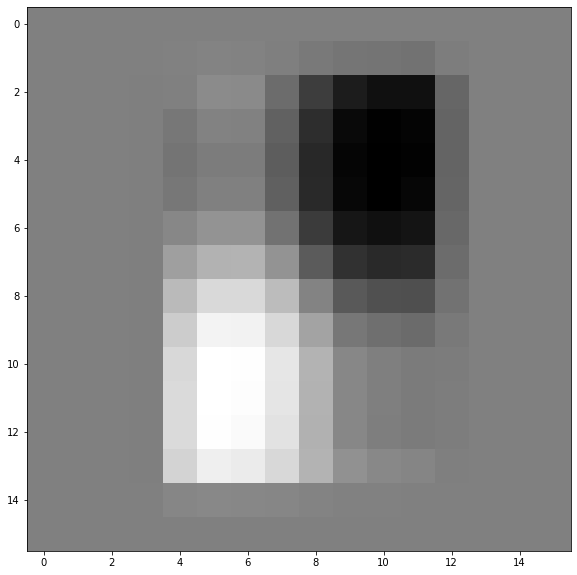

In [25]:
#left_singular[‘u3’]
#right_singular[‘s3]
#singular_matix[‘v_t3]

plt.figure(figsize=(20,10))
columns = 5
for i in range(2):
    #plt.subplot(1/ columns + 1, columns, i + 1)
    plt.imshow(left_singular["u1"][:,i].reshape(image_ht,image_wt),cmap='binary')

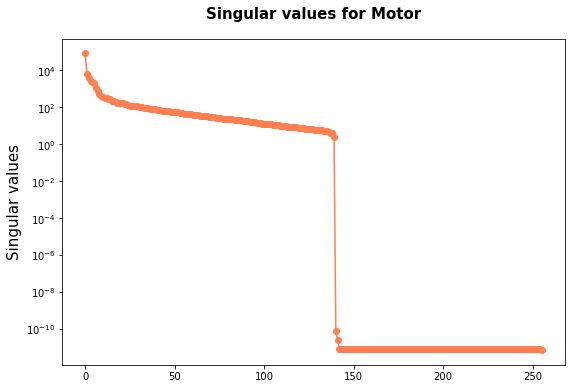

In [26]:
#Plot Singular values for motor
plt.figure(figsize = (9, 6))
plt.plot(singular_matrix['s1'], color='coral', marker='o')
plt.title('Singular values for Motor',fontsize=15,weight="bold",pad=20)
plt.ylabel('Singular values' ,fontsize=15)
plt.yscale("log")
plt.show()

In [27]:
singular_matrix

{'s0': array([8.01378072e+04, 5.92156358e+03, 3.88889185e+03, 2.87889941e+03,
        2.23193776e+03, 1.49326700e+03, 1.09024607e+03, 9.61673535e+02,
        5.31875520e+02, 3.95906809e+02, 3.32215165e+02, 3.23679428e+02,
        2.94488355e+02, 2.81339606e+02, 2.61109731e+02, 2.35906157e+02,
        2.31005716e+02, 2.15608966e+02, 1.90671018e+02, 1.70447561e+02,
        1.55025285e+02, 1.50221632e+02, 1.41007227e+02, 1.38470774e+02,
        1.30877694e+02, 1.22757295e+02, 1.16791491e+02, 1.14057558e+02,
        1.07194827e+02, 1.03077458e+02, 1.00286506e+02, 9.67184316e+01,
        9.32844262e+01, 8.77230518e+01, 8.43358000e+01, 8.10744943e+01,
        8.04350805e+01, 7.53630478e+01, 7.38427508e+01, 7.34312797e+01,
        6.80109321e+01, 6.50491980e+01, 6.31901646e+01, 6.25775261e+01,
        6.00701130e+01, 5.78345469e+01, 5.54526420e+01, 5.45428742e+01,
        5.35822195e+01, 5.29104179e+01, 5.05003968e+01, 4.99000211e+01,
        4.71588000e+01, 4.37076458e+01, 4.31730467e+01, 4.

In [76]:
I = np.eye(x_test.shape[0])
kappas=np.arange(5,50)
len_test=x_test.shape[1]
predictions=np.empty((y_test.shape[1],0), dtype = int)

for t in list(kappas):
    prediction = []
    for i in range(len_test):
        residuals = []
        for j in range(2):
            u=left_singular["u"+str(j)][:,0:t]
            res=norm( np.dot(I-np.dot(u,u.T), x_test[i]  ))
            residuals.append(res)
        index_min = np.argmin(residuals)
        prediction.append(index_min)
        
    prediction=np.array(prediction)
    predictions=np.hstack((predictions,prediction.reshape(-1,1)))

scores=[]
for i in range(len(kappas)):
    score=accuracy_score(y_test.loc[0,:],predictions[:,i])
    scores.append(score)
data = {"Number_of_basis_vectors":list(kappas), "accuracy_score":scores}
df = pd.DataFrame(data).set_index("Number_of_basis_vectors")

In [77]:
df

,accuracy_score
Number_of_basis_vectors,
5,0.607727
6,0.646360
7,0.579495
8,0.589896
9,0.564636
10,0.560178
11,0.551263
12,0.582467
13,0.591382


In [74]:
import matplotlib.pyplot as plt
plt.switch_backend('TkAgg')

df.plot
plt.show()

In [73]:
import matplotlib
matplotlib.get_backend()

'WebAgg'

No handles with labels found to put in legend.


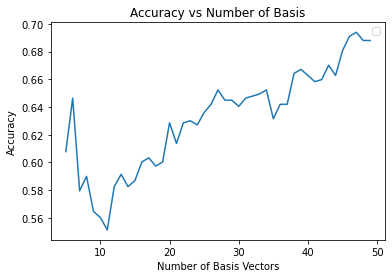

In [82]:
plt.title('Accuracy vs Number of Basis')
plt.plot(df.accuracy_score,)
plt.ylabel('Accuracy')
plt.xlabel('Number of Basis Vectors')
plt.legend()

fig3 = plt.gcf()
# show the plot
plt.show()
#Save figure 
fig3.savefig('/Users/talukdarraianferdous/Documents/Course Work/Fall 2022/Math - Data Driven Science/Final Project/Accuracy_Basis_Graph.png', dpi=500)

In [45]:
pd.set_option('display.max_colwidth',12)
confusion_matrix_df = pd.DataFrame( confusion_matrix(y_test.loc[0,:],predictions[:,42]) )
#confusion_matrix_df = confusion_matrix_df.rename(columns = {'visual','motor'}, index = {'visual','motor'})
confusion_matrix_df

,0,1
0,250,73
1,133,217


Text(33.0, 0.5, 'Predicted')

Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/tkinter/__init__.py", line 814, in callit
    func(*args)
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "/Users/talukdarraianferdous/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matp

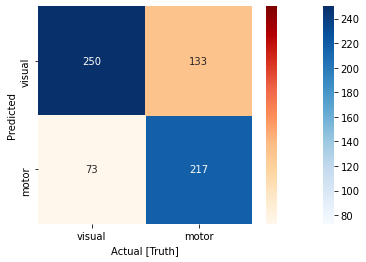

In [83]:
#Generate Confusion Matrix
import seaborn as sns

cf_matrix = np.array([[confusion_matrix_df[0][0],confusion_matrix_df[0][1]],
                     [confusion_matrix_df[1][0],confusion_matrix_df[1][1]]])

vmin = np.min(cf_matrix)
vmax = np.max(cf_matrix)
off_diag_mask = np.eye(*cf_matrix.shape, dtype=bool)

names =[ "visual", "motor"]
fig = plt.figure()
sns.heatmap(cf_matrix, annot=True, fmt="d", xticklabels=names, yticklabels=names, mask=~off_diag_mask, cmap='Blues', vmin=vmin, vmax=vmax)
sns.heatmap(cf_matrix, annot=True, fmt="d", xticklabels=names, yticklabels=names, mask=off_diag_mask, cmap='OrRd', vmin=vmin, vmax=vmax, cbar_kws=dict(ticks=[]))
plt.xlabel('Actual [Truth]')
plt.ylabel('Predicted')



In [40]:
#Print Classification Report
print(classification_report(y_test.loc[0,:],predictions[:,42]))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       323
           1       0.75      0.62      0.68       350

    accuracy                           0.69       673
   macro avg       0.70      0.70      0.69       673
weighted avg       0.70      0.69      0.69       673

